In [2]:
# import packages
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [6]:
# load the datset

extracted_data = pd.read_csv('/Users/cansezgin/Downloads/extracted_nba_players.csv')

In [8]:
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


In [18]:
# model preparation
y = extracted_data['target_5yrs']
X = extracted_data.drop('target_5yrs', axis = 1)

In [26]:
y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

In [24]:
X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,18.282353


In [28]:
# Perform a split operation on the data
# Assign the outputs as follows: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.25, random_state = 0)

In [30]:
# print the shape of each output

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


Each training DataFrame contains 1,005 rows, while each test DataFrame contains 335 rows. Additionally, there are 10 columns in each X DataFrame, with only one column in each y DataFrame.

In [47]:
# Model Building

# Assign 'nb' to be the appropriate implementation of Naive Bayes
nb = naive_bayes.GaussianNB()

# fit your model to your training data
nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred"
y_pred = nb.predict(X_test)

In [55]:
### Results and Evaluation
# Leverage metrics to evaluate your model's performance

print ('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))
print ('precision score:'), print(metrics.precision_score(y_test, y_pred))
print ('recall score:'), print(metrics.recall_score(y_test, y_pred))
print ('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6985074626865672
precision score:
0.8211920529801324
recall score:
0.6262626262626263
f1 score:
0.7106017191977076


(None, None)

The accuracy score of the model is 0.698 or 69% accurate.

The model shows a precision score of 0.821, suggesting the model is quite good at predicting true positives—meaning the player will play longer than five years— while balancing false positives.

The recall score of 0.626 shows worse performance in predicting true negatives—where the player will not play for five years or more— while balancing false negatives.

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.710, which suggests reasonable predictive power in this model.

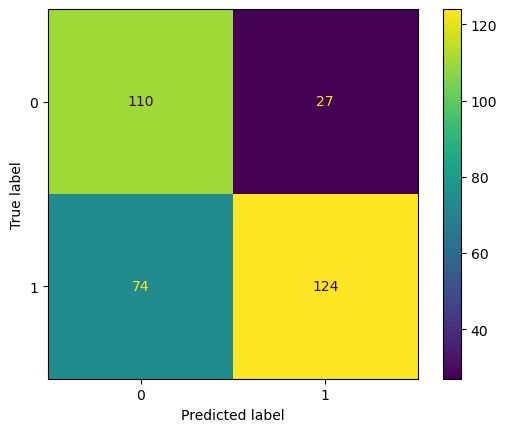

In [67]:
### GAIN CLARITY WITH CONFUSION MATRIX

# construct and display your confusion matrix for your predicted and test values

cm = metrics.confusion_matrix(y_test, y_pred)

# create the display for your confusion matrix

disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb.classes_)

# plot the matrix
disp.plot()

- The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.
- The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.821).
- True negatives and false negatives are closer in number, which explains the worse recall score.